In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:


files = ["ap_2010.csv", "class_size.csv", 
         "demographics.csv", "graduation.csv", 
         "hs_directory.csv", "math_test_results.csv", 
         "sat_results.csv"]

data = {}

# 把所有df放到一个dict里
for f in files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

In [2]:
data.keys()

dict_keys(['hs_directory', 'math_test_results', 'graduation', 'sat_results', 'ap_2010', 'class_size', 'demographics'])

In [5]:
for key, val in data.items():
    print('--'* 30 + '\n' + key + '：\n')
    print(val.head(2))

------------------------------------------------------------
hs_directory：

      dbn                          school_name      boro building_code  \
0  17K548  Brooklyn School for Music & Theatre  Brooklyn          K440   
1  09X543     High School for Violin and Dance     Bronx          X400   

   phone_number    fax_number grade_span_min  grade_span_max  \
0  718-230-6250  718-230-6262              9              12   
1  718-842-0687  718-589-9849              9              12   

  expgrade_span_min  expgrade_span_max  \
0               NaN                NaN   
1               NaN                NaN   

                         ...                          \
0                        ...                           
1                        ...                           

                                          priority02  \
0                    Then to New York City residents   
1  Then to New York City residents who attend an ...   

                            priority03     

观察看到除了class_size和hs_directory，每个表里都有一栏‘DBN’，谷歌一下知道这是学校的unique code。这可能是把所有表merge的一个关键词。

In [6]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [7]:
# 给class_size和hs_directory两个表加上‘DBN'一栏
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

中途发现了其它有用数据，加上

In [9]:
survey1 = pd.read_excel(open('schools/survey_all.xlsx', 'rb'), 
                        sheetname = 'Sheet1', 
                        skiprows = [0, 1])
survey2 = pd.read_excel(open('schools/survey_d75.xlsx', 'rb'), 
                        sheetname = 'Sheet1', 
                        skiprows = [0, 1])

survey1['d75'] = False
survey2['d75'] = True
survey = pd.concat([survey1, survey2], axis=0)

In [10]:
print(len(survey1.columns), len(survey2.columns))

1938 1769


In [11]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,com_p_11,com_s_11,com_t_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,7.6,NaN,7.8,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,7.6,NaN,8.5,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,8.3,NaN,6.3,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,8.2,5.9,6.2,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,7.9,NaN,7.3,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [12]:
# 初步清洗一下survey, 加到data dictionary里
survey["DBN"] = survey["dbn"]

survey_fields = ["DBN", 
                 "rr_s", "rr_t", "rr_p", 
                 "N_s", "N_t", "N_p", 
                 "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", 
                 "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", 
                 "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", 
                 "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"
                ]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

(1702, 23)

现在data dictionary里有7个dataframe，每个dataframe里都有一栏代表学校代码的'DBN'。

## condensing dataset

如果以'DBN'为关键词来合并所有dataframe，需要确保每个'DBN'只有一行。

In [13]:
for key in data.keys():
    print(key)
    print(len(data[key]['DBN']) - len(data[key]['DBN'].unique()))

hs_directory
0
survey
0
math_test_results
27346
graduation
24673
sat_results
0
ap_2010
1
class_size
26124
demographics
8481


可以看到在'math_test_results', 'graduation', 'ap_2010', 'class_size'和'demographcis'里至少一个DBN出现了多次。我们需要对这五个表操作一下把多行aggregate为一行。

### clean math_test_results

In [15]:
math = data['math_test_results']
math.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [16]:
# 只选一个最近的年份
math = math.loc[math.Year==2011, :]

In [17]:
len(math.DBN) - math.DBN.nunique()

3818

In [18]:
math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 5 to 28477
Data columns (total 16 columns):
DBN                 4950 non-null object
Grade               4950 non-null object
Year                4950 non-null int64
Category            4950 non-null object
Number Tested       4950 non-null int64
Mean Scale Score    4950 non-null object
Level 1 #           4950 non-null object
Level 1 %           4950 non-null object
Level 2 #           4950 non-null object
Level 2 %           4950 non-null object
Level 3 #           4950 non-null object
Level 3 %           4950 non-null object
Level 4 #           4950 non-null object
Level 4 %           4950 non-null object
Level 3+4 #         4950 non-null object
Level 3+4 %         4950 non-null object
dtypes: int64(2), object(14)
memory usage: 657.4+ KB


In [20]:
# 去掉一些无关的col
math.Category.value_counts()

All Students    4950
Name: Category, dtype: int64

In [21]:
math.columns

Index(['DBN', 'Grade', 'Year', 'Category', 'Number Tested', 'Mean Scale Score',
       'Level 1 #', 'Level 1 %', 'Level 2 #', 'Level 2 %', 'Level 3 #',
       'Level 3 %', 'Level 4 #', 'Level 4 %', 'Level 3+4 #', 'Level 3+4 %'],
      dtype='object')

In [22]:
['Level 1 #', 'Level 1 %', 'Level 2 #', 'Level 2 %', 
 'Level 3 #', 'Level 3 %', 'Level 4 #', 'Level 4 %', 
 'Level 3+4 #', 'Level 3+4 %'][1::2]


['Level 1 %', 'Level 2 %', 'Level 3 %', 'Level 4 %', 'Level 3+4 %']

In [23]:
# trim off redundant cols
math = math[['DBN', 'Number Tested', 'Mean Scale Score',
            'Level 1 %', 'Level 2 %', 'Level 3 %', 'Level 4 %', 'Level 3+4 %']]  


In [25]:
math.info()
math.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 5 to 28477
Data columns (total 8 columns):
DBN                 4950 non-null object
Number Tested       4950 non-null int64
Mean Scale Score    4950 non-null object
Level 1 %           4950 non-null object
Level 2 %           4950 non-null object
Level 3 %           4950 non-null object
Level 4 %           4950 non-null object
Level 3+4 %         4950 non-null object
dtypes: int64(1), object(7)
memory usage: 348.0+ KB


,DBN,Number Tested,Mean Scale Score,Level 1 %,Level 2 %,Level 3 %,Level 4 %,Level 3+4 %
5,01M015,28,671,35.7%,46.4%,17.9%,0%,17.9%
11,01M015,28,668,10.7%,50%,32.1%,7.1%,39.3%
17,01M015,25,667,20%,32%,48%,0%,48%
24,01M015,81,669,22.2%,43.2%,32.1%,2.5%,34.6%
30,01M019,34,679,5.9%,67.6%,20.6%,5.9%,26.5%


In [26]:
# 转换数据格式
for col in ['Mean Scale Score', 'Level 1 %', 'Level 2 %', 'Level 3 %', 
            'Level 4 %', 'Level 3+4 %']:
    math[col] = math[col].str.replace('%', '')
    math[col] = pd.to_numeric(math[col], errors='coerce')

In [27]:
math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 5 to 28477
Data columns (total 8 columns):
DBN                 4950 non-null object
Number Tested       4950 non-null int64
Mean Scale Score    4882 non-null float64
Level 1 %           4882 non-null float64
Level 2 %           4882 non-null float64
Level 3 %           4882 non-null float64
Level 4 %           4882 non-null float64
Level 3+4 %         4882 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 348.0+ KB


In [28]:
math.head()

,DBN,Number Tested,Mean Scale Score,Level 1 %,Level 2 %,Level 3 %,Level 4 %,Level 3+4 %
5,01M015,28,671.0,35.7,46.4,17.9,0.0,17.9
11,01M015,28,668.0,10.7,50.0,32.1,7.1,39.3
17,01M015,25,667.0,20.0,32.0,48.0,0.0,48.0
24,01M015,81,669.0,22.2,43.2,32.1,2.5,34.6
30,01M019,34,679.0,5.9,67.6,20.6,5.9,26.5


In [29]:
math = math.groupby('DBN').mean().reset_index()

In [30]:
len(math.DBN) - math.DBN.nunique()

0

In [32]:
data['math_test_results'] = math

### clean 'graduation' dataset

In [72]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [80]:
grad = data['graduation']

In [35]:
grad.Cohort.value_counts()

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

In [36]:
grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
Demographic                           25096 non-null object
DBN                                   25096 non-null object
School Name                           25096 non-null object
Cohort                                25096 non-null object
Total Cohort                          25096 non-null int64
Total Grads - n                       25096 non-null object
Total Grads - % of cohort             25096 non-null object
Total Regents - n                     25096 non-null object
Total Regents - % of cohort           25096 non-null object
Total Regents - % of grads            25051 non-null object
Advanced Regents - n                  25096 non-null object
Advanced Regents - % of cohort        25096 non-null object
Advanced Regents - % of grads         25051 non-null object
Regents w/o Advanced - n              25096 non-null object
Regents w/o Advanced - % of cohort    25096 non-null

Do some google search I know that there are three types of diploma: advanced rengents, rengents, and local. The former is better than the latter.

In [45]:
grad.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [47]:
mask = grad['Total Regents - % of cohort'] == grad['Regents w/o Advanced - % of cohort']

In [49]:
grad[~mask]

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%
6,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5%,19,36.5%,57.6%,...,11,21.2%,33.299999999999997%,14,26.9%,42.4%,16,30.8%,1,1.9%
7,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2003,87,67,77%,39,44.8%,58.2%,...,28,32.200000000000003%,41.8%,28,32.200000000000003%,41.8%,9,10.3%,11,12.6%
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,112,75,67%,36,32.1%,48%,...,30,26.8%,40%,39,34.799999999999997%,52%,33,29.5%,4,3.6%
9,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2005,121,64,52.9%,35,28.9%,54.7%,...,31,25.6%,48.4%,29,24%,45.3%,41,33.9%,11,9.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
11,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006 Aug,124,60,48.4%,42,33.9%,70%,...,34,27.4%,56.7%,18,14.5%,30%,39,31.5%,20,16.100000000000001%
20,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2002,55,22,40%,11,20%,50%,...,7,12.7%,31.8%,11,20%,50%,18,32.700000000000003%,11,20%
22,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2004,65,29,44.6%,13,20%,44.8%,...,10,15.4%,34.5%,16,24.6%,55.2%,27,41.5%,8,12.3%
23,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2005,88,49,55.7%,38,43.2%,77.599999999999994%,...,20,22.7%,40.799999999999997%,11,12.5%,22.4%,20,22.7%,14,15.9%


从上面可以看出来，advanced rengent是total rangent的一个子集，而local, still enrolled, dropped out和total rangent没有交集。

In [75]:
# 进一步探究下col之间的的关系
sus_cols = ['DBN', 'Cohort', 'Total Cohort',
       'Total Grads - n',  'Total Regents - n', 
       'Advanced Regents - n', 'Regents w/o Advanced - n',
       'Local - n',  'Still Enrolled - n',
       'Dropped Out - n']
grad[sus_cols]

,DBN,Cohort,Total Cohort,Total Grads - n,Total Regents - n,Advanced Regents - n,Regents w/o Advanced - n,Local - n,Still Enrolled - n,Dropped Out - n
0,01M292,2003,5,s,s,s,s,s,s,s
1,01M292,2004,55,37,17,0,17,20,15,3
2,01M292,2005,64,43,27,0,27,16,9,9
3,01M292,2006,78,43,36,0,36,7,16,11
4,01M292,2006 Aug,78,44,37,0,37,7,15,11
5,01M448,2001,64,46,32,7,25,14,10,6
6,01M448,2002,52,33,19,8,11,14,16,1
7,01M448,2003,87,67,39,11,28,28,9,11
8,01M448,2004,112,75,36,6,30,39,33,4
9,01M448,2005,121,64,35,4,31,29,41,11


* 'Total Cohort'的层级结构和包含关系：
    * 'Total Grads - n'
        * 'Total Regents - n'
            * 'Advanced Regents - n'
            * 'Regents w/o Advanced - n'
        * 'Local - n'
    * 'Still Enrolled - n'
    * 'Dropped Out - n'

In [82]:
# remove redundant cols
cols = ['DBN', 'School Name', 'Total Grads - % of cohort', 
       'Total Regents - % of cohort', 'Advanced Regents - % of cohort',  
       'Local - % of cohort', 'Still Enrolled - % of cohort', 'Dropped Out - % of cohort']

In [83]:
grad = grad[cols]

In [81]:
to_convert = ['Total Grads - % of cohort', 
       'Total Regents - % of cohort', 'Advanced Regents - % of cohort',  
       'Local - % of cohort', 'Still Enrolled - % of cohort', 'Dropped Out - % of cohort']

for col in to_convert:
    grad[col] = grad.loc[:, col].str.replace('%', '')
    grad[col] = pd.to_numeric(grad.loc[:, col], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
Demographic                           25096 non-null object
DBN                                   25096 non-null object
School Name                           25096 non-null object
Cohort                                25096 non-null object
Total Cohort                          25096 non-null int64
Total Grads - n                       25096 non-null object
Total Grads - % of cohort             16704 non-null float64
Total Regents - n                     25096 non-null object
Total Regents - % of cohort           16704 non-null float64
Total Regents - % of grads            25051 non-null object
Advanced Regents - n                  25096 non-null object
Advanced Regents - % of cohort        16704 non-null float64
Advanced Regents - % of grads         25051 non-null object
Regents w/o Advanced - n              25096 non-null object
Regents w/o Advanced - % of cohort    25096 non-n

In [84]:
grad.info()
grad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 8 columns):
DBN                               25096 non-null object
School Name                       25096 non-null object
Total Grads - % of cohort         16704 non-null float64
Total Regents - % of cohort       16704 non-null float64
Advanced Regents - % of cohort    16704 non-null float64
Local - % of cohort               16704 non-null float64
Still Enrolled - % of cohort      16704 non-null float64
Dropped Out - % of cohort         16704 non-null float64
dtypes: float64(6), object(2)
memory usage: 1.5+ MB


,DBN,School Name,Total Grads - % of cohort,Total Regents - % of cohort,Advanced Regents - % of cohort,Local - % of cohort,Still Enrolled - % of cohort,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,NaN,NaN,NaN,NaN,NaN,NaN
1,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,67.3,30.9,0.0,36.4,27.3,5.5
2,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,67.2,42.2,0.0,25.0,14.1,14.1
3,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,55.1,46.2,0.0,9.0,20.5,14.1
4,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,56.4,47.4,0.0,9.0,19.2,14.1


In [87]:
grad = grad.groupby(['DBN','School Name']).mean().reset_index()

In [88]:
grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
DBN                               423 non-null object
School Name                       423 non-null object
Total Grads - % of cohort         400 non-null float64
Total Regents - % of cohort       400 non-null float64
Advanced Regents - % of cohort    400 non-null float64
Local - % of cohort               400 non-null float64
Still Enrolled - % of cohort      400 non-null float64
Dropped Out - % of cohort         400 non-null float64
dtypes: float64(6), object(2)
memory usage: 26.5+ KB


In [93]:
grad = grad.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 422
Data columns (total 8 columns):
DBN                               400 non-null object
School Name                       400 non-null object
Total Grads - % of cohort         400 non-null float64
Total Regents - % of cohort       400 non-null float64
Advanced Regents - % of cohort    400 non-null float64
Local - % of cohort               400 non-null float64
Still Enrolled - % of cohort      400 non-null float64
Dropped Out - % of cohort         400 non-null float64
dtypes: float64(6), object(2)
memory usage: 28.1+ KB
None
0


In [97]:
grad.info()

print(len(grad.DBN) - grad.DBN.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 422
Data columns (total 8 columns):
DBN                               400 non-null object
School Name                       400 non-null object
Total Grads - % of cohort         400 non-null float64
Total Regents - % of cohort       400 non-null float64
Advanced Regents - % of cohort    400 non-null float64
Local - % of cohort               400 non-null float64
Still Enrolled - % of cohort      400 non-null float64
Dropped Out - % of cohort         400 non-null float64
dtypes: float64(6), object(2)
memory usage: 28.1+ KB
0


In [98]:
data['graduation'] = grad

### clean 'ap_2010'

In [99]:
data['ap_2010'].DBN.value_counts().head()

04M610    2
12X248    1
07X551    1
11X418    1
11X299    1
Name: DBN, dtype: int64

In [241]:
data['ap_2010'].loc[data['ap_2010'].DBN=='04M610', :]

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
51,04M610,THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...,41,55,29
52,04M610,YOUNG WOMEN'S LEADERSHIP SCH,s,s,s


In [100]:
ap = data['ap_2010']
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          258 non-null object
Total Exams Taken                       258 non-null object
Number of Exams with scores 3 4 or 5    258 non-null object
dtypes: object(5)
memory usage: 10.2+ KB


In [101]:
ap.columns

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

In [102]:
ap.columns = ap.columns.str.strip()

In [104]:
for col in ['AP Test Takers', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5']:
    ap[col] = pd.to_numeric(ap.loc[:, col], errors='coerce')
    
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          233 non-null float64
Total Exams Taken                       233 non-null float64
Number of Exams with scores 3 4 or 5    151 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


In [110]:
ap['AP Test Takers'].isnull()

0      False
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237     True
238    False
239     True
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252     True
253    False
254    False
255    False
256    False
257    False
Name: AP Test Takers, dtype: bool

In [112]:
mask = (ap['AP Test Takers'].isnull()) & (ap['Total Exams Taken'].isnull()) & (ap['Number of Exams with scores 3 4 or 5'].isnull())

In [113]:
mask.sum()

25

In [115]:
ap = ap[~mask]

In [116]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     233 non-null object
SchoolName                              233 non-null object
AP Test Takers                          233 non-null float64
Total Exams Taken                       233 non-null float64
Number of Exams with scores 3 4 or 5    151 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.9+ KB


In [118]:
len(ap.DBN) - ap.DBN.nunique()

0

In [119]:
data['ap_2010'] = ap

### clean 'class_size'

In [122]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [135]:
cls = data['class_size']
cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 17 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

In [124]:
cls.columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')

In [125]:
cls['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

In [126]:
cls['GRADE '].value_counts()

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE , dtype: int64

In [127]:
mask = (cls['PROGRAM TYPE']=='GEN ED') & (cls['GRADE ']=='09-12')

In [136]:
cls = cls.loc[mask]

In [129]:
cls.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01M292


In [131]:
cls['CORE SUBJECT (MS CORE and 9-12 ONLY)'].value_counts()  # 这个var可以忽略

ENGLISH           1977
SCIENCE           1636
SOCIAL STUDIES    1453
MATH              1447
Name: CORE SUBJECT (MS CORE and 9-12 ONLY), dtype: int64

In [ ]:
for col in ['NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS']: 
    cls[col] = pd.to_numeric(cls.iloc[:, col], errors='coerce')

In [138]:
cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 225 to 27608
Data columns (total 17 columns):
CSD                                     6513 non-null int64
BOROUGH                                 6513 non-null object
SCHOOL CODE                             6513 non-null object
SCHOOL NAME                             6513 non-null object
GRADE                                   6513 non-null object
PROGRAM TYPE                            6513 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    6513 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     6513 non-null object
SERVICE CATEGORY(K-9* ONLY)             6513 non-null object
NUMBER OF STUDENTS / SEATS FILLED       6513 non-null float64
NUMBER OF SECTIONS                      6513 non-null float64
AVERAGE CLASS SIZE                      6513 non-null float64
SIZE OF SMALLEST CLASS                  6513 non-null float64
SIZE OF LARGEST CLASS                   6513 non-null float64
DATA SOURCE                     

In [139]:
cls = cls[['DBN', 'SCHOOL NAME','NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS']]

In [140]:
cls = cls.groupby(['DBN', 'SCHOOL NAME']).mean().reset_index()

In [141]:
cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
DBN                                  583 non-null object
SCHOOL NAME                          583 non-null object
NUMBER OF STUDENTS / SEATS FILLED    583 non-null float64
NUMBER OF SECTIONS                   583 non-null float64
AVERAGE CLASS SIZE                   583 non-null float64
SIZE OF SMALLEST CLASS               583 non-null float64
SIZE OF LARGEST CLASS                583 non-null float64
dtypes: float64(5), object(2)
memory usage: 32.0+ KB


In [142]:
data['class_size'] = cls

### cleaning 'demographics'

In [144]:
demo = data['demographics']
demo.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [145]:
demo.columns

Index(['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_per', 'hispanic_num', 'hispanic_per', 'white_num', 'white_per',
       'male_num', 'male_per', 'female_num', 'female_per'],
      dtype='object')

谷歌一下知道，美国的high school指的是grade9 - grade 12。([来源](http://www.go2travel.com.tw/PA/education/kiski/system.htm))

In [147]:
demo.loc[:, 'grade9':'grade12']

,grade9,grade10,grade11,grade12
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,,,,
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [148]:
# 故技重施，把grade9 - grade12不全为空的行保留下来
mask = (demo.grade9.isnull()) & (demo.grade10.isnull()) & (demo.grade11.isnull()) & (demo.grade12.isnull())

demo = demo[~mask]

In [149]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4066 entries, 6 to 10074
Data columns (total 38 columns):
DBN                  4066 non-null object
Name                 4066 non-null object
schoolyear           4066 non-null int64
fl_percent           2557 non-null object
frl_percent          2420 non-null float64
total_enrollment     4066 non-null int64
prek                 1520 non-null object
k                    1534 non-null object
grade1               1541 non-null object
grade2               1536 non-null object
grade3               1536 non-null object
grade4               1540 non-null object
grade5               1547 non-null object
grade6               1930 non-null object
grade7               2001 non-null object
grade8               2004 non-null object
grade9               3974 non-null object
grade10              3846 non-null object
grade11              3674 non-null object
grade12              3513 non-null object
ell_num              3958 non-null float64
ell_percen

In [150]:
demo.schoolyear.value_counts()

20112012    1509
20102011     461
20092010     450
20082009     436
20072008     422
20062007     399
20052006     389
Name: schoolyear, dtype: int64

In [154]:
demo = demo.loc[demo.schoolyear==20112012, :]

In [155]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 6 to 10074
Data columns (total 38 columns):
DBN                  1509 non-null object
Name                 1509 non-null object
schoolyear           1509 non-null int64
fl_percent           0 non-null object
frl_percent          1509 non-null float64
total_enrollment     1509 non-null int64
prek                 1509 non-null object
k                    1509 non-null object
grade1               1509 non-null object
grade2               1509 non-null object
grade3               1509 non-null object
grade4               1509 non-null object
grade5               1509 non-null object
grade6               1509 non-null object
grade7               1509 non-null object
grade8               1509 non-null object
grade9               1509 non-null object
grade10              1509 non-null object
grade11              1509 non-null object
grade12              1509 non-null object
ell_num              1509 non-null float64
ell_percent  

In [156]:
len(demo.DBN) - demo.DBN.nunique()

0

In [159]:
cols = ['DBN', 'Name','asian_per', 'black_per', 
        'hispanic_per', 'white_per',
       'male_per',  'female_per'
        ]
demo = demo[cols]
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 6 to 10074
Data columns (total 8 columns):
DBN             1509 non-null object
Name            1509 non-null object
asian_per       1509 non-null float64
black_per       1509 non-null float64
hispanic_per    1509 non-null float64
white_per       1509 non-null float64
male_per        1509 non-null float64
female_per      1509 non-null float64
dtypes: float64(6), object(2)
memory usage: 106.1+ KB


In [160]:
data['demographics'] = demo

In [161]:
for key in data.keys():
    print(key)
    print(len(data[key]['DBN']) - len(data[key]['DBN'].unique()))

hs_directory
0
survey
0
math_test_results
0
graduation
0
sat_results
0
ap_2010
0
class_size
0
demographics
0


Now we've condensed 'math_test_results', 'graduation', 'ap_2010', 'class_size' and 'demographcis' dataframe, each DBN in each dataframe is unique.

## clean other data sets

We still have the following 3 datasets to look at and do some basic cleaning: 'hs_directory', 'survey', 'sat_results'.

### clean 'hs_directory'

In [256]:
hs = data['hs_directory']
hs.head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9,14.0,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680


In [166]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 59 columns):
dbn                                 435 non-null object
school_name                         435 non-null object
boro                                435 non-null object
building_code                       435 non-null object
phone_number                        435 non-null object
fax_number                          423 non-null object
grade_span_min                      435 non-null object
grade_span_max                      435 non-null int64
expgrade_span_min                   33 non-null object
expgrade_span_max                   33 non-null float64
bus                                 434 non-null object
subway                              358 non-null object
primary_address_line_1              435 non-null object
city                                435 non-null object
state_code                          435 non-null object
zip                                 435 non-null int64
we

In [219]:
hs.grade_span_min = pd.to_numeric(hs.grade_span_min, errors='coerce')

In [257]:
hs = hs.loc[(hs.grade_span_min <= 9)&(hs.grade_span_max >= 9), :]
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 434
Data columns (total 59 columns):
dbn                                 432 non-null object
school_name                         432 non-null object
boro                                432 non-null object
building_code                       432 non-null object
phone_number                        432 non-null object
fax_number                          420 non-null object
grade_span_min                      432 non-null float64
grade_span_max                      432 non-null int64
expgrade_span_min                   32 non-null object
expgrade_span_max                   32 non-null float64
bus                                 431 non-null object
subway                              356 non-null object
primary_address_line_1              432 non-null object
city                                432 non-null object
state_code                          432 non-null object
zip                                 432 non-null int64
w

In [258]:
cols = ['school_type', 'advancedplacement_courses', 'online_ap_courses', 
        'extracurricular_activities', 'school_sports', 'partner_cbo', 
        'partner_hospital', 'partner_highered', 'partner_cultural', 
        'partner_nonprofit', 'partner_corporate', 'partner_financial', 
        'partner_other', 'se_services', 'ell_programs', 'number_programs']

In [259]:
for col in cols:
    print('--' * 20)
    print(col + ':\n')
    print(hs[col].value_counts().head(2))

----------------------------------------
school_type:

CTE School           36
Consortium School    17
Name: school_type, dtype: int64
----------------------------------------
advancedplacement_courses:

English Literature and Composition, United States History    10
English Literature and Composition                            8
Name: advancedplacement_courses, dtype: int64
----------------------------------------
online_ap_courses:

Biology                         3
Spanish Language and Culture    3
Name: online_ap_courses, dtype: int64
----------------------------------------
extracurricular_activities:

After-school Tutoring, Art, Fine and Visual Arts (Ceramics, Drawing, Painting, Sculpture), Art History, Cheerleading, Vocal Music (Concert Choir, Chorus), Fine and Performing Arts (Dance, Drama), Journalism, Instrumental Music, Marching Band, Math, Mentor, Mock Trial, Music, National Honor Society, Photography, Poetry, SAT Prep, Saturday Academy, Science, Step Team, Student Governme

In [260]:
try:
    for col in cols[1:-1]:
        hs.loc[:, col] = hs[col].fillna('').str.split(',')
        hs.loc[:, col] = hs[col].apply(lambda x: 0 if x == [''] else len(x))
except:
    print(col)

/Users/EzraYang/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [261]:
for col in cols:
    print('--' * 20)
    print(col + ':\n')
    print(hs[col].value_counts().head(2))

----------------------------------------
school_type:

CTE School           36
Consortium School    17
Name: school_type, dtype: int64
----------------------------------------
advancedplacement_courses:

0    95
3    46
Name: advancedplacement_courses, dtype: int64
----------------------------------------
online_ap_courses:

0    368
2     17
Name: online_ap_courses, dtype: int64
----------------------------------------
extracurricular_activities:

12    28
13    24
Name: extracurricular_activities, dtype: int64
----------------------------------------
school_sports:

0    138
1     78
Name: school_sports, dtype: int64
----------------------------------------
partner_cbo:

1    90
0    81
Name: partner_cbo, dtype: int64
----------------------------------------
partner_hospital:

0    236
1    125
Name: partner_hospital, dtype: int64
----------------------------------------
partner_highered:

1    90
2    64
Name: partner_highered, dtype: int64
----------------------------------------
p

Now they are all in int type.

In [278]:
hs = hs[cols]

In [279]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 434
Data columns (total 19 columns):
school_type                   104 non-null object
advancedplacement_courses     432 non-null int64
online_ap_courses             432 non-null int64
extracurricular_activities    432 non-null int64
school_sports                 432 non-null int64
partner_cbo                   432 non-null int64
partner_hospital              432 non-null int64
partner_highered              432 non-null int64
partner_cultural              432 non-null int64
partner_nonprofit             432 non-null int64
partner_corporate             432 non-null int64
partner_financial             432 non-null int64
partner_other                 432 non-null int64
se_services                   432 non-null int64
ell_programs                  432 non-null int64
number_programs               432 non-null int64
Location 1                    432 non-null object
DBN                           432 non-null object
school_nam

In [282]:
# adding lat and lon columns
hs['lat'] = hs['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
hs['lon'] = hs['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    hs[c] = pd.to_numeric(hs[c])

/Users/EzraYang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/EzraYang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/EzraYang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [285]:
data['hs_directory'] = hs

### clean 'survey' dataset 

In [287]:
sv = data['survey']
sv.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_10,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,NaN,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,NaN,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,NaN,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,NaN,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,NaN,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [288]:
sv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 55
Data columns (total 23 columns):
DBN           1702 non-null object
rr_s          1041 non-null float64
rr_t          1702 non-null int64
rr_p          1702 non-null int64
N_s           1036 non-null float64
N_t           1700 non-null float64
N_p           1696 non-null float64
saf_p_11      1696 non-null float64
com_p_11      1696 non-null float64
eng_p_11      1696 non-null float64
aca_p_11      1696 non-null float64
saf_t_11      1700 non-null float64
com_t_11      1700 non-null float64
eng_t_10      0 non-null float64
aca_t_11      1700 non-null float64
saf_s_11      1036 non-null float64
com_s_11      1036 non-null float64
eng_s_11      1036 non-null float64
aca_s_11      1036 non-null float64
saf_tot_11    1702 non-null float64
com_tot_11    1702 non-null float64
eng_tot_11    1702 non-null float64
aca_tot_11    1702 non-null float64
dtypes: float64(20), int64(2), object(1)
memory usage: 319.1+ KB


In [ ]:
# it's clean enough

### clean 'sat_results'

In [290]:
sat = data['sat_results']
sat.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [291]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [292]:
sat.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score'],
      dtype='object')

In [294]:
cols = ['Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score']

In [295]:
for col in cols:
    sat[col] = pd.to_numeric(sat.loc[:, col], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             421 non-null float64
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
dtypes: float64(4), object(2)
memory usage: 22.5+ KB


In [296]:
sat['sat_score'] = sat[cols[1]] + sat[cols[2]] + sat[cols[3]]

In [297]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             421 non-null float64
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
sat_score                          421 non-null float64
dtypes: float64(5), object(2)
memory usage: 26.2+ KB


In [298]:
data['sat_results'] = sat

Now we have looked into each of the datasets in the 'data' dictionary, we've made sure each row represents a unique school, extract useful columns, and convert data type wherever necessary.  
Next we can combine them into one single dataframe.

## combining the dataset

In [302]:
data.keys()

dict_keys(['hs_directory', 'survey', 'math_test_results', 'graduation', 'sat_results', 'ap_2010', 'class_size', 'demographics'])

In [337]:
full = data['sat_results']

In [338]:
for key in ['hs_directory', 'survey', 'math_test_results', 'graduation',
            'ap_2010', 'class_size', 'demographics']:
    full = full.merge(data[key], on='DBN', how='left')

In [339]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 80 columns):
DBN                                     478 non-null object
SCHOOL NAME                             478 non-null object
Num of SAT Test Takers                  421 non-null float64
SAT Critical Reading Avg. Score         421 non-null float64
SAT Math Avg. Score                     421 non-null float64
SAT Writing Avg. Score                  421 non-null float64
sat_score                               421 non-null float64
school_type                             72 non-null object
advancedplacement_courses               367 non-null float64
online_ap_courses                       367 non-null float64
extracurricular_activities              367 non-null float64
school_sports                           367 non-null float64
partner_cbo                             367 non-null float64
partner_hospital                        367 non-null float64
partner_highered                        367 n

In [311]:
full.shape

(478, 80)

In [313]:
# add a column to indicate school district
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

Finally, we’ll need to fill in any missing values in full with the median of the column, so we can compute correlations:

In [417]:
full = full.fillna(full.median())

## computing correlations

In [315]:
full.corr().shape

(71, 71)

In [320]:
r = full.corr()['sat_score'].dropna().round(decimals=2)

In [327]:
strong = r[abs(r) >= 0.7]
upper_med = r[(0.7> abs(r)) & (abs(r)>= 0.5)]
lower_med = r[(0.5 > abs(r)) & (abs(r)>= 0.3)]
weak = r[0.3 > abs(r) ]

In [330]:
for gr in [strong, upper_med, lower_med, weak]:
    print(len(gr))

5
7
14
43


In [345]:
strong.sort_values(ascending=False)

sat_score                          1.00
SAT Writing Avg. Score             0.98
SAT Critical Reading Avg. Score    0.97
SAT Math Avg. Score                0.95
Advanced Regents - % of cohort     0.77
Name: sat_score, dtype: float64

In [346]:
upper_med.sort_values(ascending=False)

white_per                               0.63
Total Regents - % of cohort             0.60
AP Test Takers                          0.55
Total Exams Taken                       0.54
asian_per                               0.53
Number of Exams with scores 3 4 or 5    0.53
advancedplacement_courses               0.52
Name: sat_score, dtype: float64

In [347]:
lower_med.sort_values(ascending=False)

Num of SAT Test Takers               0.49
Total Grads - % of cohort            0.46
N_p                                  0.44
N_s                                  0.43
extracurricular_activities           0.41
NUMBER OF STUDENTS / SEATS FILLED    0.39
AVERAGE CLASS SIZE                   0.37
NUMBER OF SECTIONS                   0.36
SIZE OF LARGEST CLASS                0.31
N_t                                  0.30
hispanic_per                        -0.35
Still Enrolled - % of cohort        -0.37
Local - % of cohort                 -0.40
Dropped Out - % of cohort           -0.43
Name: sat_score, dtype: float64

In [348]:
weak.sort_values(ascending=False)

saf_t_11                  0.27
rr_s                      0.27
Level 4 %                 0.27
Level 3+4 %               0.26
aca_s_11                  0.25
SIZE OF SMALLEST CLASS    0.25
saf_tot_11                0.24
Mean Scale Score          0.24
saf_s_11                  0.23
partner_highered          0.18
number_programs           0.16
aca_tot_11                0.15
partner_cultural          0.14
eng_s_11                  0.13
com_s_11                  0.13
aca_t_11                  0.12
Level 3 %                 0.12
rr_p                      0.10
saf_p_11                  0.09
female_per                0.09
Number Tested             0.09
com_t_11                  0.08
partner_financial         0.08
com_tot_11                0.07
eng_tot_11                0.07
partner_corporate         0.06
ell_programs              0.04
partner_other             0.03
aca_p_11                  0.02
eng_p_11                  0.02
rr_t                      0.00
partner_nonprofit        -0.01
partner_

In [351]:
for key in data.keys():
    print(key, ':')
    print(data[key].columns)

hs_directory :
Index(['school_type', 'advancedplacement_courses', 'online_ap_courses',
       'extracurricular_activities', 'school_sports', 'partner_cbo',
       'partner_hospital', 'partner_highered', 'partner_cultural',
       'partner_nonprofit', 'partner_corporate', 'partner_financial',
       'partner_other', 'se_services', 'ell_programs', 'number_programs',
       'Location 1', 'DBN', 'school_name', 'lat', 'lon'],
      dtype='object')
survey :
Index(['DBN', 'rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11',
       'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_10',
       'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11',
       'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11'],
      dtype='object')
math_test_results :
Index(['DBN', 'Number Tested', 'Mean Scale Score', 'Level 1 %', 'Level 2 %',
       'Level 3 %', 'Level 4 %', 'Level 3+4 %'],
      dtype='object')
graduation :
Index(['DBN', 'School Name', 'Total Grads - % of cohort',
  

In [388]:
# 看一看sat_score的分布情况

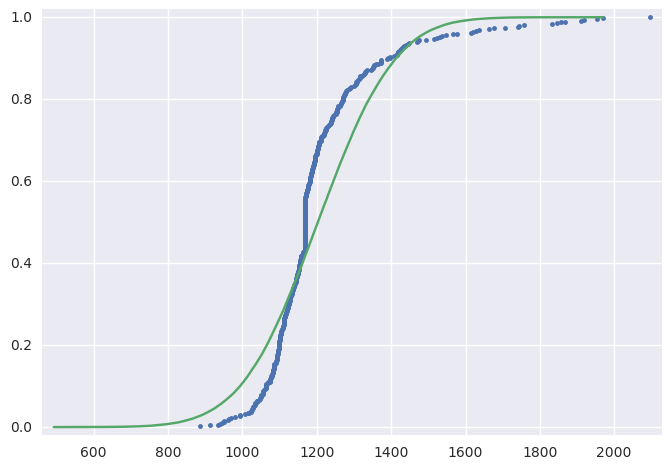

In [448]:
mu = np.mean(full.sat_score)
std = np.std(full.sat_score)

x_real = full.sat_score.sort_values()
y_real = np.arange(1, len(x_real) + 1) / len(x_real)

x_theo = np.sort(np.random.normal(mu, std, 100000))
y_theo = np.arange(1, len(x_theo) + 1) / len(x_theo)

_ = plt.plot(x_real, y_real, marker='.', linestyle='none')
_ = plt.plot(x_theo, y_theo)

plt.margins(0.02)

plt.show()

(array([  14.,  136.,  157.,   60.,   27.,    8.,    7.,    5.,    6.,    1.]),
 array([  887. ,  1007.9,  1128.8,  1249.7,  1370.6,  1491.5,  1612.4,
         1733.3,  1854.2,  1975.1,  2096. ]),
 <a list of 10 Patch objects>)

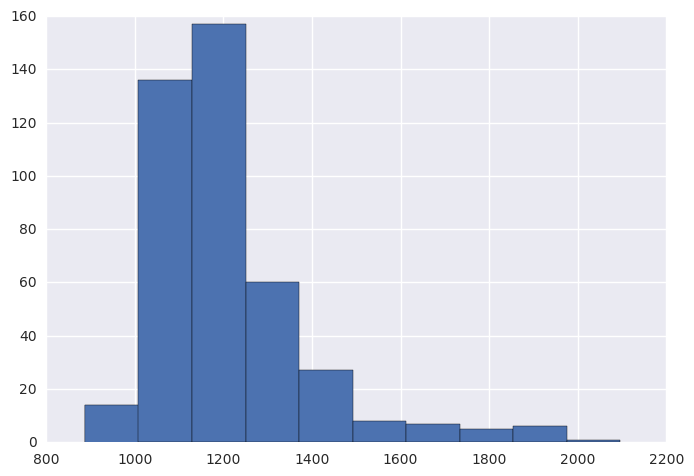

In [395]:
plt.hist(full.sat_score.dropna())

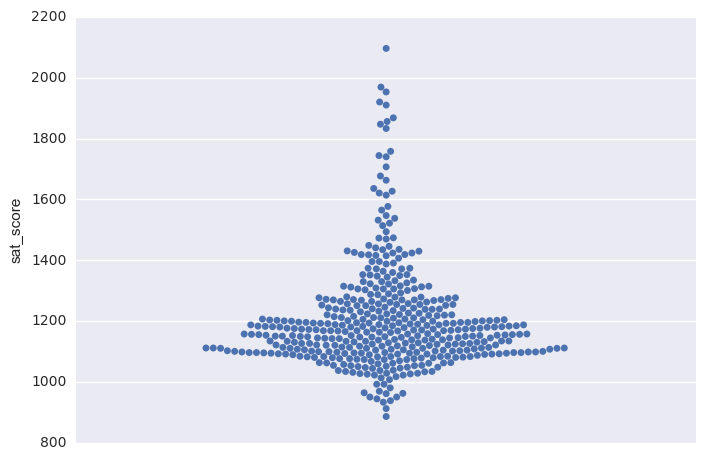

In [396]:
sns.swarmplot(y='sat_score', data=full)

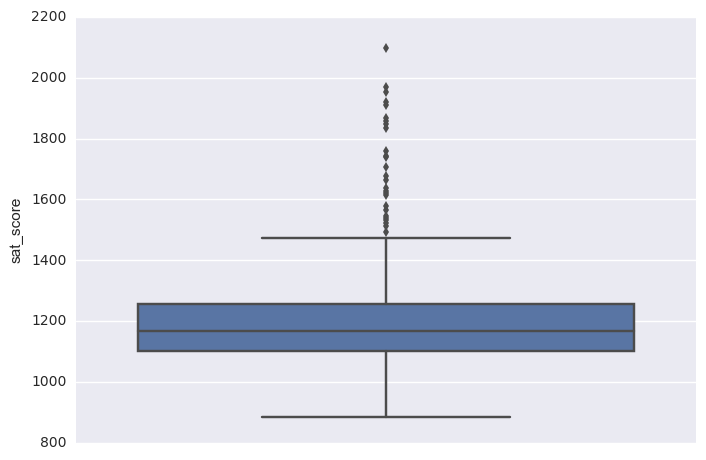

In [401]:
sns.boxplot(data=full, y='sat_score')

In [412]:
full.loc[full['sat_score'] > 1450, :].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,school_type,advancedplacement_courses,online_ap_courses,...,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,Name,asian_per,black_per,hispanic_per,white_per,male_per,female_per
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159.0,522.0,574.0,525.0,1621.0,NaN,NaN,NaN,...,25.510526,19.473684,31.210526,NEW EXPLORATIONS INTO SCIENCE TECH AND MATH,27.8,11.7,14.2,44.9,49.2,50.8
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130.0,624.0,604.0,628.0,1856.0,NaN,0.0,0.0,...,20.975000,17.166667,24.250000,BARD HIGH SCHOOL EARLY COLLEGE,15.1,15.1,18.2,49.8,31.3,68.7
28,02M408,PROFESSIONAL PERFORMING ARTS HIGH SCHOOL,94.0,509.0,490.0,523.0,1522.0,NaN,2.0,0.0,...,28.952941,25.117647,31.588235,PROFESSIONAL PERFORMING ARTS HIGH SCHOOL,7.0,19.1,23.7,41.8,25.3,74.7
29,02M411,BARUCH COLLEGE CAMPUS HIGH SCHOOL,104.0,496.0,563.0,518.0,1577.0,NaN,5.0,0.0,...,26.573333,19.400000,31.533333,BARUCH COLLEGE CAMPUS HIGH SCHOOL,60.6,5.8,14.6,18.8,44.0,56.0
30,02M412,N.Y.C. LAB SCHOOL FOR COLLABORATIVE STUDIES,114.0,537.0,590.0,550.0,1677.0,NaN,10.0,0.0,...,32.566667,30.466667,34.466667,NYC LAB SCHOOL FOR COLLABORATIVE STUDIES,29.4,8.5,14.0,45.9,47.0,53.0


In [408]:
full.loc[full['sat_score'] > 1450, :]['school_type'].value_counts()

Specialized School    9
Consortium School     2
Name: school_type, dtype: int64

In [407]:
sum(full.loc[full['sat_score'] > 1450, :]['school_type'].notnull())

11

In [411]:
full['school_type'].value_counts()



CTE School                          25
Consortium School                   17
International School                10
Specialized School                   9
All-Girls School                     7
Consortium, International School     3
All-Boys School                      1
Name: school_type, dtype: int64

In [410]:
sum(full['school_type'].isnull())

406

除了用来构建sat_score的变量和sat_score本身，和sat_score相关性最强的是‘Advanced Rengents % of cohort'. 其它几个描述毕业生情况的变量也有不低的相关性。总体来说，描述毕业生去向的这个数据集和sat_score是最有关系的。

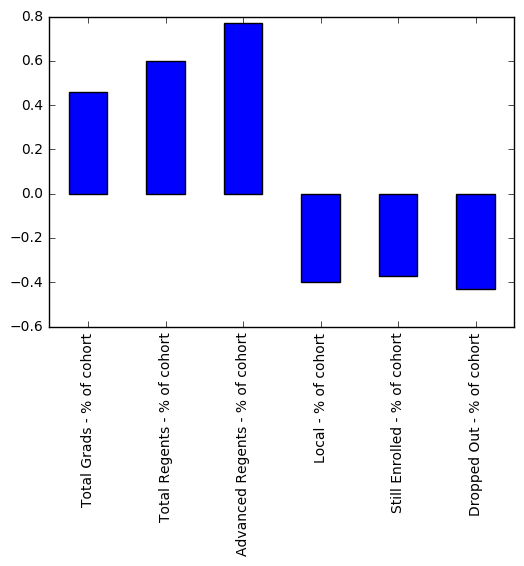

In [360]:
r[['Total Grads - % of cohort',
       'Total Regents - % of cohort', 'Advanced Regents - % of cohort',
       'Local - % of cohort', 'Still Enrolled - % of cohort',
       'Dropped Out - % of cohort']].plot.bar()

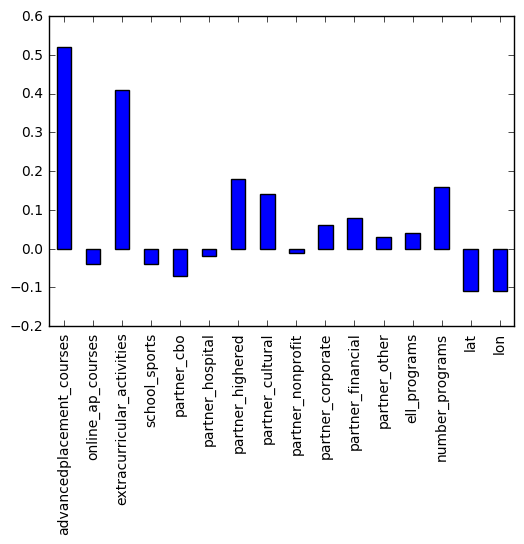

In [359]:
r[concern].plot.bar()

关于学校人口构成的变量，白人和亚裔所占比重和sata_score有中等强度正相关性；黑人和拉丁裔有中下强度的负相关性；性别比重则与sat_score相关性微弱。

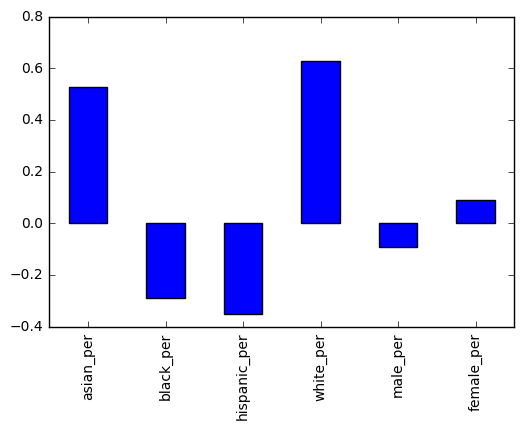

In [361]:
r[['asian_per', 'black_per', 'hispanic_per', 'white_per',
       'male_per', 'female_per']].plot.bar()

参加AP测试的人数越多，AP测试的总数越多，拿到高分的AP测试越多，则we would expect a higher sat_score of that school.  
This result seems reasonable, but the 3 variable is measured in absolute value, not a percentage. Therefore, there could be a bias in favor of the population in that school.

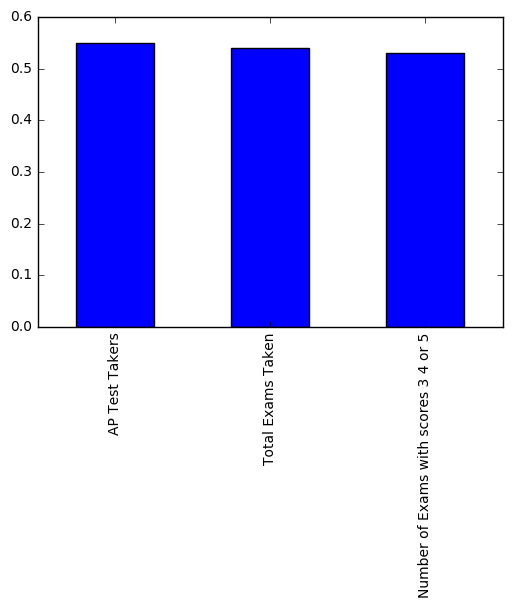

In [362]:
r[['AP Test Takers', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5']].plot.bar()

在所有衡量学校资源多少的变量中，只有两个与sat_score有中等强度的相关性(advancedplacement_courses and extracurricular_activities)；其余变量，诸如与学校建立合作关系的医院、高等教育机构、文化机构等的数量都与sat_score关系微弱。当然，学校的社会资源用’与之有合作关系的机构数量‘来衡量并不准确，但起码在已有数据中我们可以说相关性最显著的还是AP课程的数量和课外活动的数量。  

出人意料的是，在线AP课程的数量和sat_score不仅关系微弱，而且是负相关。

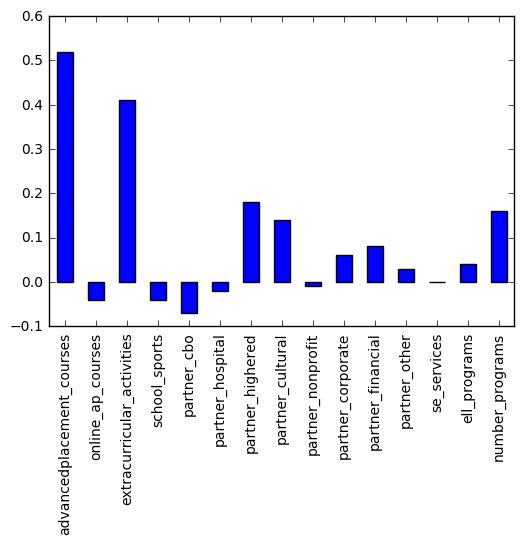

In [364]:
r[['advancedplacement_courses', 'online_ap_courses',
       'extracurricular_activities', 'school_sports', 'partner_cbo',
       'partner_hospital', 'partner_highered', 'partner_cultural',
       'partner_nonprofit', 'partner_corporate', 'partner_financial',
       'partner_other', 'se_services', 'ell_programs', 'number_programs']].plot.bar()

描述课堂规模的五个变量均和sat_score有中等强度的正相关。

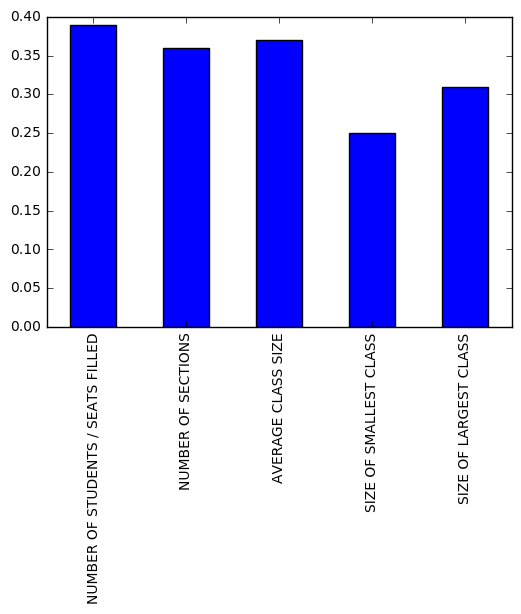

In [365]:
r[['NUMBER OF STUDENTS / SEATS FILLED',
       'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS',
       'SIZE OF LARGEST CLASS']].plot.bar()

在关于调查结果变量中，只有参与调查学生数、参与调查家长数与sat_score有中等强度相关性。与前面提到的课堂规模、参与AP测试的人数类似，参与调查的学生数和家长数是用绝对值衡量，都和一所学校的总人口相关。

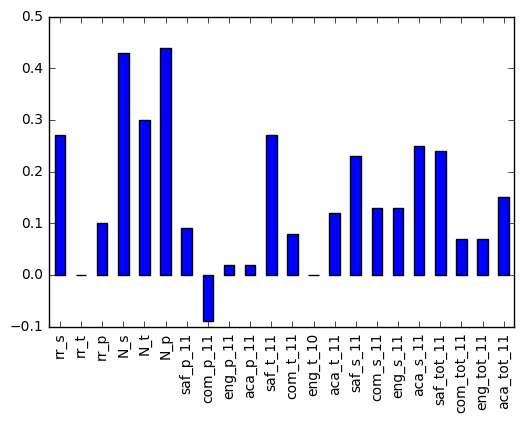

In [366]:
r[['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11',
       'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_10',
       'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11',
       'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']].plot.bar()

测试一下这几个用绝对人数来衡量的变量的内相关性。

In [378]:
r.popu = full.corr()[['advancedplacement_courses', 
'extracurricular_activities','NUMBER OF STUDENTS / SEATS FILLED',
       'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS',
       'SIZE OF LARGEST CLASS', 'N_s', 'N_p']].loc[('advancedplacement_courses', 
'extracurricular_activities','NUMBER OF STUDENTS / SEATS FILLED',
       'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS',
       'SIZE OF LARGEST CLASS', 'N_s', 'N_p'), :]

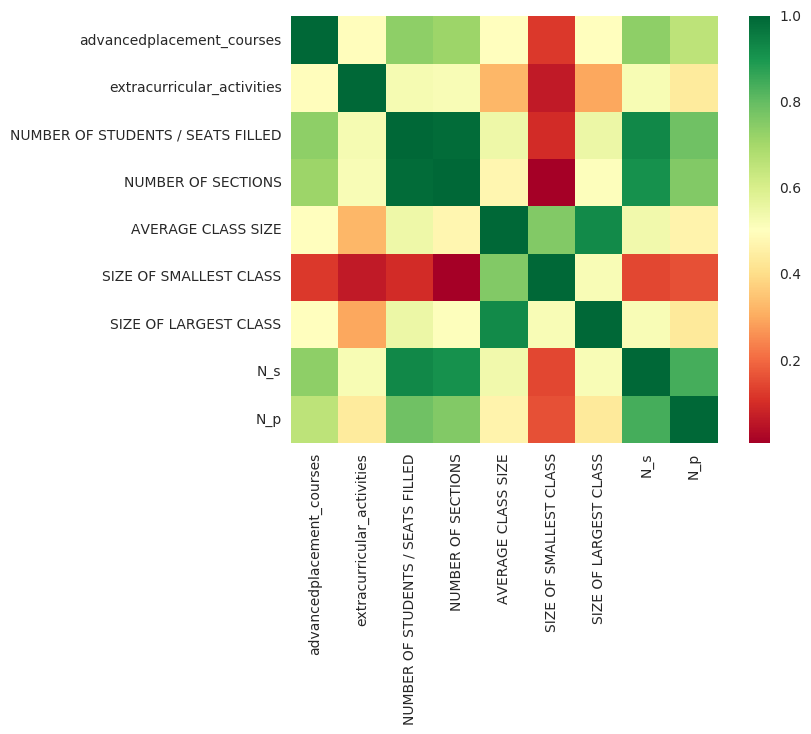

In [387]:
sns.heatmap(r.popu, square=True, cmap='RdYlGn')

嗯。。没有像想象中那样一篇全绿，’SIZE OF SMALLEST CLASS‘和很多变量是负相关的，还有很多相互之间相关度并不大的变量。

后记，数据格式转换这一步其实应该在condensing datasets时顺手做掉，  
因为到现在已经合并了df了，full有太多栏，到时候报错比较难发现到底哪里出错。